##【問題1】中心点の初期値を決める

入力されたデータから 
K
 個の中心点 
μ
1
 から 
μ
K
 の初期値を決めるコードを作成してください。
K
 は指定したクラスタ数です。


最もシンプルな初期値の決定方法は、データ点 
X
n
 の中からランダムに 
K
 個選ぶことです。今回はこれを実装してください。


K-meansの学習結果は中心点 
μ
 の初期値に影響を受けます。そのため、学習時には複数個の初期値で計算を行います。

##【問題2】SSEを求める関数の作成

クラスタ内誤差平方和（SSE, Sum of Squared Errors）を計算する関数を作成してください。


K-meansはこのSSEを最小化する$rnk$と$μk$を求めることが目的となります。複数個の初期値で計算したクラスタリング結果から、どれを最終的に採用するかを決める際にこのSSEを求める関数を使用します。


$$ SSE = \sum_{n=1}^N \sum_{k=1}^K r_{nk} \parallel X_n - \mu_k\|^2 $$

$n$
 : データ点のインデックス


$k$
 : クラスタのインデックス


$X_n$
 : 
n
番目のデータ点


$μ_
k$
 : 
k
番目の中心点


$r_
n
k$
 : データ点
X
n
がクラスタ
k
に所属していたら1、そうでなければ0

## 【問題3】クラスタへの割り当て

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [246]:
class ScratchKMeans():
    """
    K-meansのスクラッチ実装
    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, n_clusters, n_init, max_iter, random_seed, tol, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters#クラスタの数
        self.n_init = n_init#中心の初期値を何回変えて計算するか
        self.max_iter = max_iter#１回の計算で最大何イテレするのか
        self.random = random_seed
        self.tol = tol
        self.verbose = verbose
        self.n_samples = x.shape[0]
        self.process = np.array([])#学習過程
        # 問題１ 中心点の初期値を決める
        np.random.seed(self.random)
        self.clusters = np.random.randint(0, self.n_clusters, self.n_samples)#所属クラスタ(初期)


    def fit(self, x):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        """
        # 問題5 繰り返し ※繰り返しが指定した回数に到達する。（雛形では引数max_iter）
        for _ in range(self.max_iter):
            centroids = np.array([])
            new_clusters = np.array([])

            # 各クラスタのデータ点の平均をとる
            # self.centroids = np.array([x[self.clusters == n, :].mean(axis=0) for n in range(self.n_clusters)])
            # 所属クラスタの更新
            # 一番近い中心点のクラスタを所属クラスタに更新する
            # argminで最小値のインデックスを取得できる
            # 問題３
            # self.new_clusters = np.array([np.linalg.norm(x - c, axis=1) for c in self.centroids]).argmin(axis=0)

            for k in range(self.n_clusters):
              z = x[self.clusters == k, :].mean(axis=0)
              self.centroids = np.append(centroids, z)

            # 問題3 クラスタへの割り当て
            for c in self.centroids:
              q = np.linalg.norm(x - c, axis=1)#ノルムが計算
              self.new_clusters = np.append(new_clusters, q)

        # 推定用にShapeと最小値をここで変更する（for文の外）
        
        # self.new_clusters = self.new_clusters.reshape(self.n_clusters, self.n_samples)
        self.new_clusters = self.new_clusters.argmin(axis=0)

        # print(self.new_clusters)
        # if self.verbose:
        #     #verboseをTrueにした際は学習過程を出力
        #     print(f'process:\n{self.process}')

    def sse(self, x):
      ##【問題2】SSEを求める関数の作成
      sse_list = []
      for n in range(x.shape[0]):
        for k in self.centroids:
          if np.any(n == 1):
            q = np.linalg.norm(x - k)**2
            # q = np.linalg.norm(x - c, axis=1)
            sse_list.append(q)
      sse = sum(sse_list)
      return sse

    def predict(self, x):

      """
      入力されたデータがどのクラスタに属するかを計算
      """
      # 空のクラスタがあった場合は中心点をランダムな点に割り当てなおす
      # for n in range(self.n_clusters):
          # if not np.any(self.new_clusters == n):
              # self.centroids[n] = x[np.random.choice(self.n_samples, 1), :]
      # self.clusters = self.new_clusters
      return self.clusters

myKMean = ScratchKMeans(n_clusters=4, n_init=10, max_iter=300, tol=0.01, verbose=False,random_seed=42)
myKMean.fit(x)
my_pred = myKMean.predict(x)
print('my_pred')
print(my_pred)
print('SSE')
print(myKMean.sse(x))

my_pred
[2 3 0 2 2 3 0 0 2 1 2 2 2 2 3 0 3 3 3 2 1 0 1 3 3 1 1 1 3 3 0 0 3 1 1 0 3
 0 0 2 2 2 1 3 3 3 3 2 1 1 2 1 2 3 2 3 3 0 2 0 2 2 0 0 2 1 3 0 3 1 1 1 0 1
 0 1 3 3 2 3 2 3 0 3 2 2 1 0 3 1 3 3 1 1 1 1 1 3 1 0]
SSE
5037.913319327696


In [220]:
iter = np.arange(0, 4, 1)
mysse = myKMean.sse(x)
# plt.plot(iter, mysse[1])
plt.show()

## 【問題6】 異なる初期値で計算

## 【問題7】推定

In [193]:
# 中心点の初期値を2回かえる場合
myKMean_2 = ScratchKMeans(n_clusters=4, n_init=2, max_iter=300, tol=0.01, verbose=False,random_seed=None)
myKMean_2.fit(x)
my_pred_2 = myKMean_2.predict(x)

print('n_init= 2')
print('my_pred_2')
print(my_pred_2)


n_init= 2
my_pred_2
[3 2 0 3 0 2 0 3 2 0 1 1 3 1 3 0 2 2 2 3 2 0 1 3 0 0 0 3 3 3 3 1 3 3 1 1 2
 2 3 1 1 0 1 0 0 2 3 1 3 3 2 2 3 2 1 1 0 1 1 1 2 1 3 2 0 0 1 3 3 2 1 0 2 3
 2 1 3 3 3 3 3 3 1 0 3 0 1 3 3 0 0 3 0 3 1 2 1 2 3 2]


In [188]:
# 中心点の初期値を5回かえる場合
myKMean_1 = ScratchKMeans(n_clusters=4, n_init=5, max_iter=300, tol=0.01, verbose=False,random_seed=None)
myKMean_1.fit(x)
my_pred_1 = myKMean_1.predict(x)

print('n_init= 5')
print('my_pred_1')
print(my_pred_1)


n_init= 5
my_pred_1
[0 1 0 1 0 2 3 2 3 3 0 1 2 2 1 2 2 2 0 1 0 2 3 2 1 2 0 1 1 3 0 0 2 3 1 3 1
 3 1 2 0 3 2 1 0 3 1 3 1 3 1 3 2 0 2 3 1 2 1 2 3 2 3 2 2 2 2 2 0 1 0 1 2 2
 2 2 0 2 1 1 1 1 2 0 0 0 1 2 3 0 2 3 2 2 1 3 2 2 2 0]


In [195]:
# 中心点の初期値を20回かえる場合
myKMean_20 = ScratchKMeans(n_clusters=4, n_init=20, max_iter=300, tol=0.01, verbose=False,random_seed=None)
myKMean_20.fit(x)
my_pred_20 = myKMean_20.predict(x)

print('n_init= 20')
print('my_pred_20')
print(my_pred_20)

n_init= 20
my_pred_20
[0 0 1 2 2 2 1 2 3 0 3 0 0 1 0 2 1 3 2 0 1 1 1 1 2 3 3 0 2 1 3 3 3 1 3 3 3
 2 3 1 1 3 2 2 0 0 1 0 1 3 0 0 2 3 2 3 3 3 3 2 1 0 3 3 3 2 0 3 3 0 3 0 2 2
 0 2 2 0 3 0 3 2 1 3 2 1 2 0 2 0 0 0 2 1 2 2 1 0 2 1]


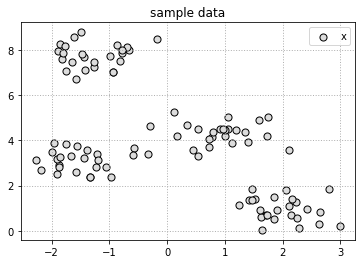

In [221]:
# データセット
from sklearn.datasets import make_blobs
x, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

plt.title("sample data")
plt.scatter(x[:, 0], x[:, 1], color="gainsboro", marker='o', edgecolor='black', s=50, label="x")

plt.grid( linestyle='dotted', linewidth=1)
plt.legend()
plt.show()

In [235]:
# scikit-learnで実装
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
predict = kmeans.fit_predict(x)
print(predict)
print(kmeans.cluster_centers_)#各クラスタの重心位置
print(kmeans.inertia_)

[0 1 0 0 0 0 3 1 0 1 1 1 1 1 1 2 2 3 3 2 0 1 3 2 0 3 3 0 2 2 2 1 2 2 3 0 1
 2 1 3 0 3 1 3 3 1 2 3 0 0 0 2 3 3 3 1 1 2 2 1 1 2 2 0 2 1 3 3 2 0 1 2 0 1
 0 0 3 3 2 2 2 1 3 0 2 3 2 2 0 0 0 3 0 3 3 1 1 3 1 0]
[[ 0.92578447  4.32475792]
 [-1.26811733  7.76378266]
 [ 1.99186903  0.96561071]
 [-1.47935679  3.11716896]]
48.63378320706403


## 【問題8】エルボー法の実装

[4940.978723560656, 5299.518443632709, 4667.412263813572, 4430.609845996121, 6290.557672467892, 4902.236383660916, 5183.4446670848665, 5315.966841456317, 4436.8424633779505, 4470.456510003677]


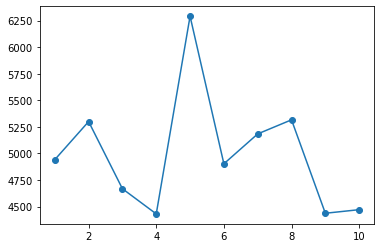

In [249]:
SSE = []
for i in range(1, 11):
  myKMean = ScratchKMeans(n_clusters=i, n_init=10, max_iter=300, tol=0.01, verbose=False,random_seed=None)
  myKMean.fit(x)
  SSE.append(myKMean.sse(x))
print(SSE)

plt.plot(range(1, 11), SSE, marker='o');